In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree






In [38]:
data = pd.read_csv('drug200.csv')

In [39]:
drug = data.copy()

In [40]:
drug.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [41]:
drug.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [42]:
#Data Cleaning
drug.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [43]:
drug.duplicated().sum()

0

In [44]:
drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [45]:
drug.describe(include='object')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,104,77,103,91


<AxesSubplot:xlabel='Drug', ylabel='Age'>

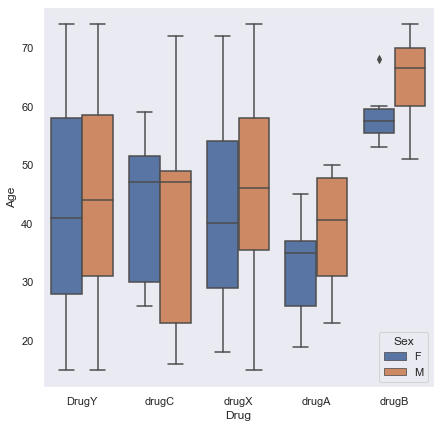

In [46]:
# data visualisation
plt.figure(figsize=(7,7)) 
sns.boxplot(x='Drug',y='Age',hue='Sex',data=drug)

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

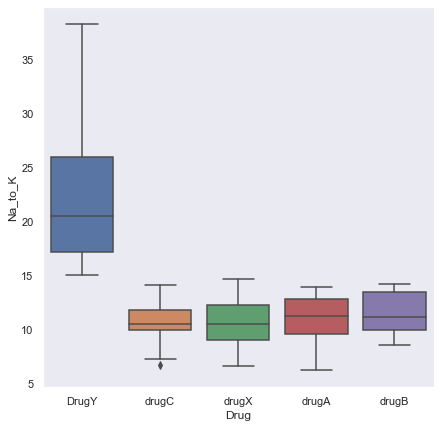

In [47]:
plt.figure(figsize=(7,7)) 
sns.boxplot(x='Drug',y='Na_to_K',data=drug)

C:\Users\ewpert gsm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age density and hist plot')

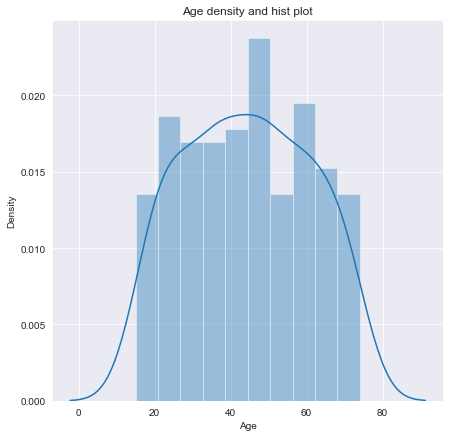

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(7,7)) 
sns.distplot(x=drug['Age'],bins=10)
plt.xlabel('Age')
plt.title('Age density and hist plot')

C:\Users\ewpert gsm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'na_t0_K Ratio')

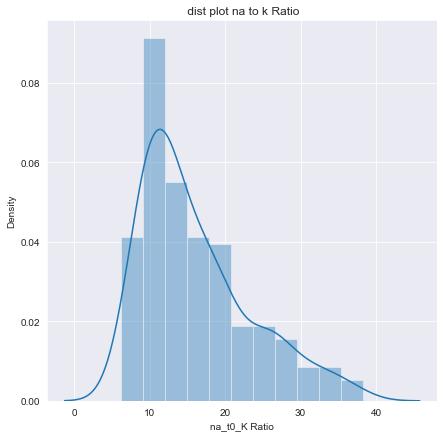

In [13]:
plt.figure(figsize=(7,7))
plt.title(' dist plot na to k Ratio')
sns.distplot(x=drug['Na_to_K'])
plt.xlabel('na_t0_K Ratio')

Text(0.5, 1.0, 'count of males and females')

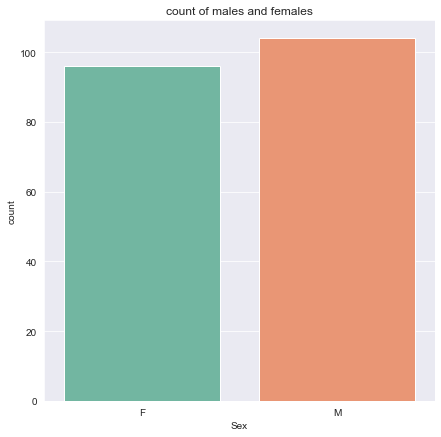

In [14]:
plt.figure(figsize=(7,7))
sns.countplot(x=drug['Sex'],palette="Set2")
plt.title('count of males and females')

Text(0.5, 1.0, 'count of bp')

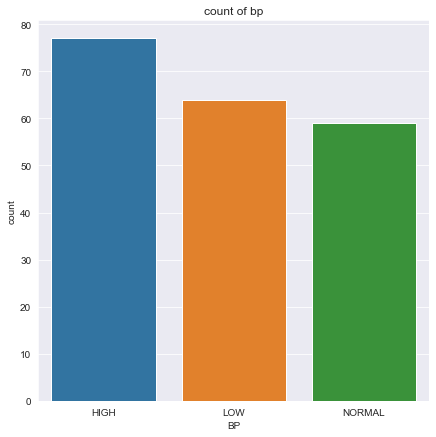

In [15]:
plt.figure(figsize=(7,7))
sns.countplot(x=drug['BP'])
plt.title('count of bp')

Text(0.5, 1.0, 'count of cholestrol')

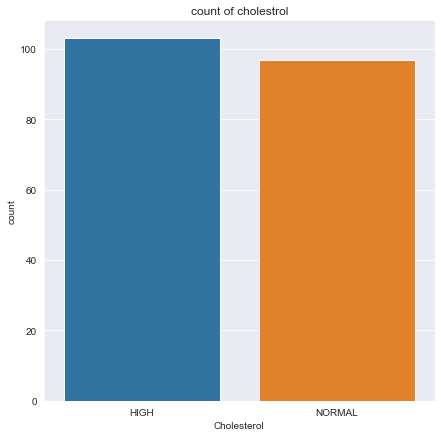

In [16]:
plt.figure(figsize=(7,7))
sns.countplot(x=drug['Cholesterol'])
plt.title('count of cholestrol')

<AxesSubplot:xlabel='Drug', ylabel='count'>

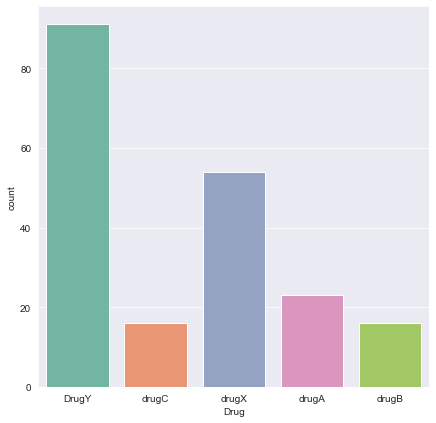

In [17]:
plt.figure(figsize=(7,7))
sns.countplot(x=drug['Drug'],palette="Set2")

<AxesSubplot:xlabel='Sex', ylabel='count'>

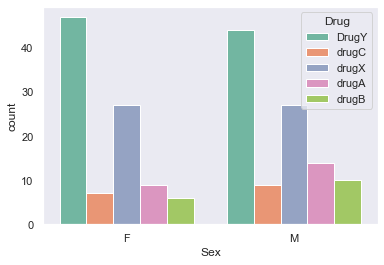

In [18]:
sns.set_theme(style="dark")
sns.countplot(x='Sex',hue="Drug",data=drug,palette="Set2")

<AxesSubplot:xlabel='Drug', ylabel='Age'>

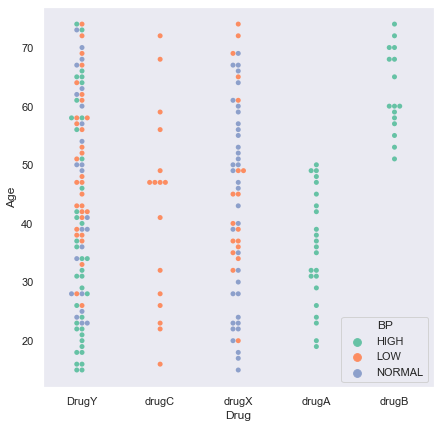

In [19]:
plt.figure(figsize=(7,7)) 
sns.swarmplot(x='Drug',y='Age',hue='BP',data=drug,palette="Set2")

<AxesSubplot:xlabel='Drug', ylabel='Age'>

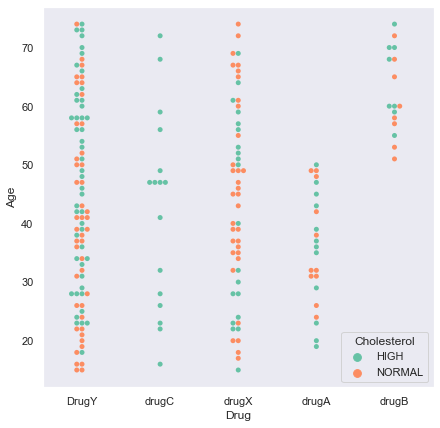

In [20]:
plt.figure(figsize=(7,7)) 
sns.swarmplot(x='Drug',y='Age',hue='Cholesterol',data=drug,palette="Set2")

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

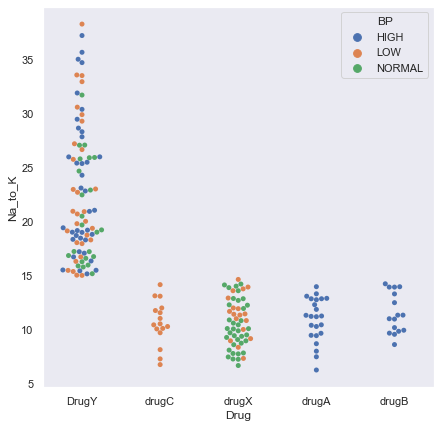

In [21]:
plt.figure(figsize=(7,7)) 
sns.swarmplot(x='Drug',y='Na_to_K',hue='BP',data=drug)

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

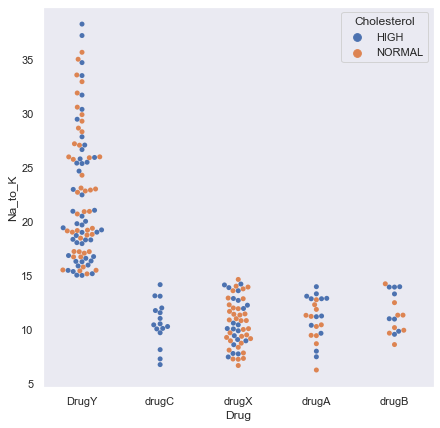

In [22]:
plt.figure(figsize=(7,7)) 
sns.swarmplot(x='Drug',y='Na_to_K',hue='Cholesterol',data=drug)

In [23]:
drug.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


<AxesSubplot:>

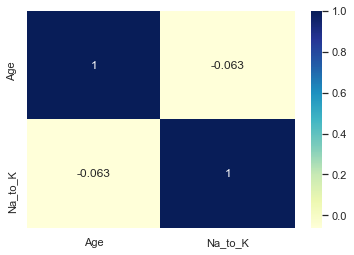

In [24]:
sns.heatmap(drug.corr(), cmap="YlGnBu", annot=True)

In [25]:
drug['Sex'] = drug['Sex'].map({'M':1,'F':0})
drug['BP'] = drug['BP'].map({'HIGH':0,'NORMAL':1,'LOW':2})
drug['Cholesterol'] = drug['Cholesterol'].map({'HIGH':1,'NORMAL':0})
drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,1,25.355,DrugY
1,47,1,2,1,13.093,drugC
2,47,1,2,1,10.114,drugC
3,28,0,1,1,7.798,drugX
4,61,0,2,1,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,2,1,11.567,drugC
196,16,1,2,1,12.006,drugC
197,52,1,1,1,9.894,drugX
198,23,1,1,0,14.020,drugX


In [26]:
drug['Drug'].value_counts(normalize=True)

DrugY    0.455
drugX    0.270
drugA    0.115
drugC    0.080
drugB    0.080
Name: Drug, dtype: float64

In [27]:
def minmax_norm(df_input):
    return (drug['Na_to_K'] - drug['Na_to_K'].min()) / ( drug['Na_to_K'].max() - drug['Na_to_K'].min())

drug['Na_to_K'] = minmax_norm(drug['Na_to_K'])
drug


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,1,0.596848,DrugY
1,47,1,2,1,0.213397,drugC
2,47,1,2,1,0.120239,drugC
3,28,0,1,1,0.047814,drugX
4,61,0,2,1,0.368191,DrugY
...,...,...,...,...,...,...
195,56,0,2,1,0.165676,drugC
196,16,1,2,1,0.179405,drugC
197,52,1,1,1,0.113359,drugX
198,23,1,1,0,0.242385,drugX


In [28]:
drug['Drug'] = drug['Drug'].replace(['DrugY','drugX','drugA','drugB','drugC'],[0,1,2,3,4])
drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,1,0.596848,0
1,47,1,2,1,0.213397,4
2,47,1,2,1,0.120239,4
3,28,0,1,1,0.047814,1
4,61,0,2,1,0.368191,0
...,...,...,...,...,...,...
195,56,0,2,1,0.165676,4
196,16,1,2,1,0.179405,4
197,52,1,1,1,0.113359,1
198,23,1,1,0,0.242385,1


In [29]:
X = drug.drop('Drug',axis=1)
y = drug['Drug']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [31]:
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (140, 5)
x_test: (60, 5)
y_train: (140,)
y_test: (60,)


In [32]:
models={
    'LogisticRegression':LogisticRegression(random_state=42,solver='liblinear'),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=5),
    'Random Forest':RandomForestClassifier(),
    'K-Nearest Neighbors':KNeighborsClassifier(),
    'Naive bayes':GaussianNB()       
}


In [33]:
#la fonction de prediction
def accu(y_true,y_pred,retu=False):
    acc=accuracy_score(y_true,y_pred)
    if retu:
        return acc
    else:
        print(f'La precision de model est: {acc}')

In [34]:
def train_test_eval(models,X_train,Y_train,X_test,Y_test):
    for name,model in models.items():
        print(name,':')
        model.fit(X_train,Y_train)
        accu(y_test,model.predict(x_test))
        print(''*30)
        
train_test_eval(models,x_train,y_train,x_test,y_test)        

LogisticRegression :
La precision de model est: 0.75

DecisionTreeClassifier :
La precision de model est: 1.0

Random Forest :
La precision de model est: 0.9833333333333333

K-Nearest Neighbors :
La precision de model est: 0.4

Naive bayes :
La precision de model est: 0.9



In [35]:

treee = DecisionTreeClassifier(max_depth=5)

treee.fit(x_train,y_train)

#Accuracy result 
print("training",  metrics.accuracy_score(y_train, treee.predict(x_train)) * 100)
print("testing", metrics.accuracy_score(y_test, treee.predict(x_test))* 100)

training 100.0
testing 100.0


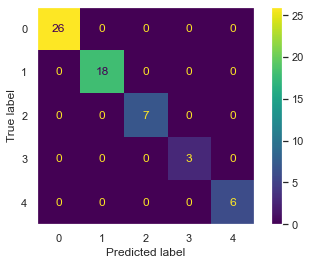

In [36]:
plot_confusion_matrix(treee, x_test, y_test) 
plt.show()

In [171]:
print(classification_report(y_test, treee.predict(x_test)))
print("accuract_score  = ", metrics.accuracy_score(y_test, treee.predict(x_test))* 100)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         6

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

accuract_score  =  100.0


In [172]:
treee.score(x_test,y_test)

1.0

In [173]:

text_representation = tree.export_text(treee)
print(text_representation)

|--- feature_4 <= 0.27
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 50.50
|   |   |   |--- class: 2
|   |   |--- feature_0 >  50.50
|   |   |   |--- class: 3
|   |--- feature_2 >  0.50
|   |   |--- feature_2 <= 1.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  1.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 4
|--- feature_4 >  0.27
|   |--- class: 0



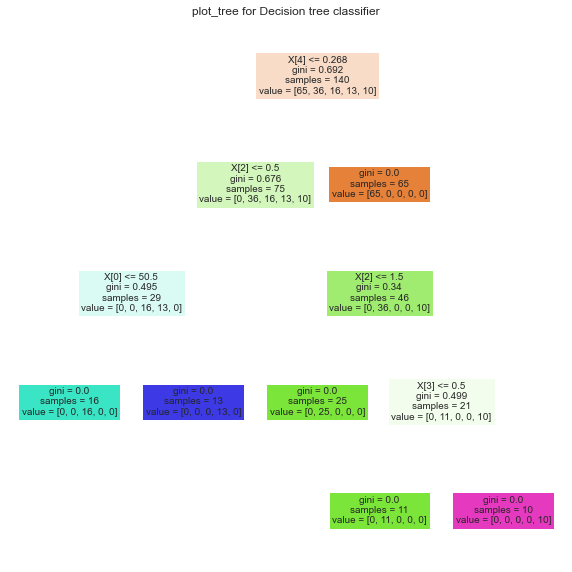

In [178]:
plt.figure(figsize=(10,10))
tree.plot_tree(treee,filled=True)
plt.title("plot_tree for Decision tree classifier")
plt.show()

In [175]:

importance_value=np.round((treee.feature_importances_)*100,2)
importance_features=[(feature,importance) for feature,importance in zip(drug.columns,importance_value)]
importance_features=sorted(importance_features,key=lambda x: x[1],reverse=True) 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in importance_features];

Variable: Na_to_K              Importance: 47.61
Variable: BP                   Importance: 26.75
Variable: Age                  Importance: 14.82
Variable: Cholesterol          Importance: 10.82
Variable: Sex                  Importance: 0.0


In [176]:
importance_df = pd.DataFrame(importance_features, columns=['Variable', 'Importance_Score'])

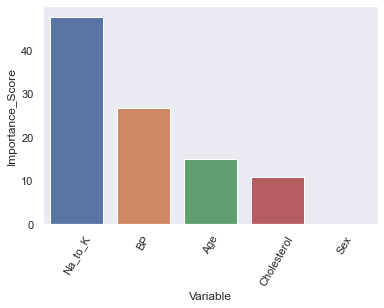

In [134]:
plt.figsize=(20,5)

sns.barplot(x = importance_df.Variable,y = importance_df .Importance_Score)

plt.xticks(rotation=60)

plt.show()